In [1]:
import seaborn as sns
sns.set_theme()

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Filter the dataset to only include 'versicolor' and 'setosa' species
filtered_iris = iris[iris['species'].isin(['versicolor', 'setosa'])]

# Select only 'sepal_length' and 'sepal_width' variables
filtered_iris = filtered_iris[['sepal_length', 'sepal_width', 'species']]

# Label 'setosa' as 1 and 'versicolor' as -1
filtered_iris['species'] = filtered_iris['species'].map({'setosa': 1, 'versicolor': -1})

sepal_size_inputs = filtered_iris[['sepal_length', 'sepal_width']].to_numpy()
target_species_output = filtered_iris['species'].to_numpy()

In [2]:
from SingleNeuronClass import SingleNeuron

In [9]:
a = [1,2,3]
b = [4,None,6]
a_prev = a.copy()
a.extend(b)
print(a)
print(a_prev)

[1, 2, 3, 4, None, 6]
[1, 2, 3]


In [ ]:
import numpy as np
from progress.bar import ShadyBar
#234567891123456789212345678931234567894123456789512345678961234567897123456789
#                                python docstring limit: 72 characters |      
#                                            python code limit: 79 characters |
# test change
class SingleNeuron(object):
    """
    A class implementing single-neuron machine learning algorithms.
    Implements the perceptron, linear regression classification, 
    and logistic regression classification.

    ...

    Attributes
    ----------
    type_perceptron [class attribute] : string
        Contains the keyword used to indicate that the algorithm
        used by the instance is perceptron.

    type_linear_regression_1D [class attribute] : string
        Contains the keyword used to indicate that the algorithm
        used by the instance is one-dimensional linear regression.
    
                                                                       |

    Methods 
    -------
    sign(cls, input_value) [class method]
        Used as an activation function.

    linear_1D(cls, input_value) [class method]
        Returns 'input_value'. Used as an activation function.

    perceptron_loss_function(cls, predicted_outputs, target_outputs)
            [class method]
        The loss function for the perceptron algorithm.

    perceptron_stochastic_gradient(cls, predicted_output, target_output)
            [class method]
        The gradient of the perceptron's loss function when it employs
        stochastic descent.

    linear_regression_loss_function(cls, predicted_outputs, 
            target_outputs) [class method]
        The loss function for the linear regression algorithm.

    linear_regression_1D_stochastic_gradient(cls, predicted_output, 
            target_output) [class method]
        The gradient of the one-dimensional linear regression loss 
        function when it employs stochastic descent.

    preactivation(cls, input, weights, bias) [class method]
        The preactivation function for the single neuron (dot product of
        weights and input vector, plus bias)

    __init__(self, data_dimension, model_type, weights=None, bias=None, 
            activation_function=None)
        Initializes a model for a given dimensionality of training data
        and model type. Can "warm start" with a user-provided weight and
        bias, otherwise randomizes them. Can also provide an activation
        function if the user wants one different from the default for 
        the model type.

    predict_outputs(self, inputs, weights=None, bias=None, 
            use_current_weights_and_bias=True)
        Outputs the model's predictions given an array of feature 
        vectors. 

    current_weights_and_bias(self)
        Utility function for wrapping weights and bias in a single tuple.

    perceptron_stochastic_gradient_update(self, input, target_output)
        Updates the weights of the perceptron model using stochastic
        descent.
    
    linear_regression_1D_stochastic_gradient_update(self, input, 
            target_output, learning_rate, training_data_length)
        Updates the weights of the linear regression model using 
        stochastic descent.
    
    train(self, inputs, target_outputs, learning_rate=0.5, 
            num_epochs=50)
        Trains the model (updates weights) using a batch of inputs and 
        target outputs.

    reset_model(self)
        Randomizes the weights and bias of the model.
    
    forget_previous_training(self)
        Resets the weights and bias to their values before the most 
        recent training.
                                                                       |
    """
    type_perceptron = "perceptron"
    type_linear_regression_1D = "linear regression 1D"

    ## NEW (Needs section in class docstring)
    type_logistic_regression_1D = "logistic regression 1D"

    @classmethod
    def sign(cls, input_value):
        """ 
        Returns the sign of input_value (+1 if it's positive, -1 if
        it's negative). 
        """
        if input_value >= 0:
            return 1
        else: 
            return -1
        
    @classmethod
    def linear_1D(cls, input_value):
        """ 
        Returns input_value. 
        """
        return input_value

    @classmethod
    def perceptron_loss_function(cls, 
                                 predicted_outputs, 
                                 target_outputs):
        """ 
        The perceptron loss function given the perceptron's predictions
        and the target outputs.

        Parameters
        ----------
        predicted_outputs : array_like
            Perceptron's predictions. 

        target_outputs : array_like
            Targets we`re training the perceptron to meet.

        Returns
        -------
        loss : float
            The error of the prediction.
        """
        return (1/4) * np.sum((predicted_outputs - target_outputs)**2)
    
    @classmethod
    def perceptron_stochastic_gradient(cls, 
                                       predicted_output, 
                                       target_output):
        """ 
        The gradient of the perceptron's loss function when it employs
        stochastic descent.

        Parameters
        ----------
        predicted_output : array_like
            Perceptron's predictions. 

        target_output : array_like
            Targets we`re training the perceptron to meet.

        Returns
        -------
        gradient : float
            The gradient of the loss function at the weights used to 
            calculate predicted_output
        """
        return (1/2) * (predicted_output - target_output)

    @classmethod
    def linear_regression_loss_function(cls, 
                                        predicted_outputs, 
                                        target_outputs):
        """ 
        The loss function for the linear regression algorithm.

        Parameters
        ----------
        predicted_outputs : array_like
            Perceptron's predictions. 

        target_outputs : array_like
            Targets we`re training the perceptron to meet.

        Returns
        -------
        loss : float
            The error of the prediction.
        """
        return (1/(2*target_outputs.size)) \
                * np.sum((predicted_outputs - target_outputs)**2)
        
    @classmethod
    def linear_regression_1D_stochastic_gradient(cls, 
                                                 predicted_output, 
                                                 target_output, 
                                                 training_data_length):
        """ 
        The gradient of the one-dimensional linear regression loss 
        function when it employs stochastic descent.

        Parameters
        ----------
        predicted_output : array_like
            The model's predictions. 

        target_output : array_like
            Targets we`re training the model to meet.

        Returns
        -------
        gradient : float
            The gradient of the loss function at the weights used to 
            calculate predicted_output

        """
        return (1/training_data_length) * (predicted_output - target_output)

    @classmethod
    def preactivation(cls, input, weights, bias):
        """ 
        The preactivation function for the single neuron (dot product of
        weights and input vector, plus bias)
        
        Parameters
        ----------
        input : array_like
            The vector input to the neuron.
        
        weights : array_like
            The vector of weights of the model.
        
        bias : float
            The bias of the model.
        
        Returns
        -------
        preactivation_value
            The dot product of input and weights, plus the bias.
        """
        if not (np.shape(input) == np.shape(weights)):
            raise ValueError("Input vector must have the same shape as weights"
                + "vector." + f"{np.shape(input) = },  {np.shape(weights) = }")
        
        return np.dot(input, weights) + bias
    
    ## NEW (needs section in class docstring)
    @classmethod
    def sigmoid(cls, input_value): 
        """ 
        Returns the value of the sigmoid function given input_value.
        https://en.wikipedia.org/wiki/Sigmoid_function
        """
        return 1.0 / (1.0 + np.exp(-input_value))

    @classmethod
    def cross_entropy_loss_function(cls, 
                                    predicted_outputs,
                                    target_outputs):
        """"""
        

    def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

    def __init__(self, 
                 data_dimension, 
                 model_type, 
                 weights=None, 
                 bias=None, 
                 activation_function=None):
        """
        Initializes a model for a given dimensionality of training data
        and model type.

        Parameters
        ----------
        data_dimension : int
            The dimensionality of the feature vectors. Shouldn't be modified
            after initialization.

        model_type : str
            The category of model. Used to select the activation function and 
            loss function. Shouldn't be modified post-initialization.

        weights : array_like
            Optional; "warm start" weights can be provided by the user, 
            otherwise weights are generated from a normal distribution.

        bias : array_like
            Optional; "warm start" bias can be provided by the user, 
            otherwise bias is generated from a normal distribution.
        
        activation_function : function
            Optional; an arbitrary activation function can be provided by the 
            user, otherwise the standard function for the model type is 
            selected.
        """
        if data_dimension < 1:
            raise ValueError(f"Provided data dimension is {data_dimension} " 
                             + "but it must be a positive integer.")
        self.data_dimension = data_dimension 
        # A single number for each feature vector has dimension 1, 
        # a 2D vector has dimension 2, etc.

        self.model_type = model_type

        if activation_function is None:
            if self.model_type == SingleNeuron.type_perceptron:
                self.activation_function = SingleNeuron.sign
            elif self.model_type == SingleNeuron.type_linear_regression_1D:
                self.activation_function = SingleNeuron.linear_1D
            elif self.model_type == SingleNeuron.type_logistic_regression_1D:
                self.activation_function = SingleNeuron.sigmoid
        else:
            self.activation_function = activation_function
        
        if weights is None:
            self.weights = np.random.randn(data_dimension)
            if data_dimension == 1:
                # Unwrap weights to a scalar if there's only one weight
                # This avoids additional checks in preactivation
                self.weights = self.weights[0]
        else:
            self.weights = weights
        self.previous_weights = self.weights

        if bias is None:
            self.bias = np.random.randn()
        else:
            self.bias = bias
        self.previous_bias = self.bias

    def predict_outputs(self, 
                        inputs, 
                        use_current_weights_and_bias=True,
                        weights=None, 
                        bias=None):
        """ 
        Outputs the model's predictions given an array of feature 
        vectors. 

        Parameters
        ----------
        inputs : array_like
            An array of feature vectors for the model to predict the outputs
            of. Array dimensions incompatible with the dimensionality of the 
            model will raise a ValueError. Compatible array shapes are:
                - Equal shape to that of the weights vector (single input)
                - Final dimension equal to that of the weights vector (multiple
                inputs)

        use_current_weights_and_bias : boolean
            Optional; if desired, the user can set this to false and provide 
            their own weights and bias whenever they require a prediction. By 
            default set to true, so this function uses the model's current 
            weights and bias.

        weights : array_like
            Optional; weight vector to use if the user desires to calculate 
            the output with weights other than the model's current weights.
        
        bias : float
            Optional; bias to use if the user desires to calculate 
            the output with bias other than the model's current bias.

        Returns
        -------
        outputs : array_like
            The model's outputs corresponding to each input.
        """
        if use_current_weights_and_bias:
            weights = self.weights
            bias = self.bias

        if np.isscalar(inputs):
            if self.data_dimension != 1:
                raise ValueError("Mismatch between expected feature vector "
                    + f"dimension ({self.data_dimension = }) and input " 
                    + f"shape ({np.shape(inputs) = }).")
            else:
                return self.activation_function(
                    SingleNeuron.preactivation(inputs, weights, bias))

        elif inputs.shape == (self.data_dimension,):
            return self.activation_function(
                SingleNeuron.preactivation(inputs, weights, bias))
        
        elif inputs.shape[-1] == self.data_dimension    \
                or (self.data_dimension == 1 and inputs.ndim == 1):
            return [self.activation_function(
                        SingleNeuron.preactivation(input, weights, bias)) 
                    for input in inputs]

        else: 
            raise ValueError("Mismatch between expected feature vector "
                + f"dimension ({self.data_dimension = }) and input " 
                + f"shape ({np.shape(inputs) = }).")
    
    def current_weights_and_bias(self):
        """ 
        Utility function for wrapping weights and bias in a single tuple.
        """
        return (self.weights.copy(), self.bias)
    
    def perceptron_stochastic_gradient_update(self, 
                                              input, 
                                              target_output):
        """ 
        Updates the weights of the perceptron model using stochastic
        descent. 
        
        Parameters
        ----------
        input : array_like
            The single input used to calculate the stochastic gradient at the
            current weights.
        
        target_output : array_like
            The single target output used to calculate the stochastic gradient
            at the current weights.
        
        Returns
        -------
        gradient : float
            The calculated gradient used to update the weights. 

        """
        gradient = SingleNeuron.perceptron_stochastic_gradient(
                        self.predict_outputs(input), target_output)
        self.weights -= gradient * input
        self.bias -= gradient
        return gradient

    def linear_regression_1D_stochastic_gradient_update(self, 
                                                        input, 
                                                        target_output, 
                                                        learning_rate, 
                                                        training_data_length):
        """ 
        Updates the weights of the linear regression model using 
        stochastic descent.
        
        Parameters
        ----------
        input : array_like
            The single input used to calculate the stochastic gradient at the
            current weights.
        
        target_output : array_like
            The single target output used to calculate the stochastic gradient
            at the current weights.
        
        Returns
        -------
        gradient : float
            The calculated gradient used to update the weights.

        """
        gradient = SingleNeuron.linear_regression_1D_stochastic_gradient(
                                                self.predict_outputs(input), 
                                                target_output, 
                                                training_data_length)
        self.weights -= learning_rate * gradient * input
        self.bias -= learning_rate * gradient
        return gradient
        
    def train(self, 
              inputs, 
              target_outputs, 
              learning_rate=0.5, 
              num_epochs=50):
        """ 
        Trains the model (updates weights) using a batch of inputs and 
        target outputs.
        
        Parameters
        ----------
        inputs : array_like
            An array of feature vectors to train the model on. Must be as 
            many feature vectors as there are target outputs.
        
        target_outputs : array_like
            An array of target outputs to compare the model's predictions to. 
            Must be as many targets as there are feature vectors.

        learning_rate : float
            Optional, and will not be used for the perceptron model; defines 
            the distance along the gradient by which the weights are adjusted 
            at every iteration.

        num_epochs : int
            Optional; defines the number of times the model looks at every 
            input-target pair. I.e. in each epoch the model looks at every
            pair.
        
        Returns
        -------
        loss_at_epoch : numpy.ndarray
            An array of the value of the model's loss function at each epoch
            in this training.
        
        """
        self.previous_weights = np.copy(self.weights)
        self.previous_bias = np.copy(self.bias)
        weight_update = None
        loss_function = None
        
        if self.model_type == SingleNeuron.type_perceptron:
            weight_update = self.perceptron_stochastic_gradient_update
            loss_function = SingleNeuron.perceptron_loss_function
            
        elif self.model_type == SingleNeuron.type_linear_regression_1D:
            weight_update = lambda input, target : \
                self.linear_regression_1D_stochastic_gradient_update(
                        input, target, learning_rate, len(target_outputs))
            loss_function = SingleNeuron.linear_regression_loss_function

        elif self.model_type == SingleNeuron.type_logistic_regression_1D:
            

        loss_at_epoch = np.empty(1 + num_epochs)
        loss_at_epoch[0] = loss_function(self.predict_outputs(inputs),
                                         target_outputs)

        for epoch_index in ShadyBar(
                "Training", 
                suffix="Epoch %(index)d / %(max)d").iter(range(num_epochs)):
            
            for input, target_output in zip(inputs, target_outputs):
                weight_update(input, target_output)
                
            loss_at_epoch[epoch_index+1] = loss_function(
                    self.predict_outputs(inputs), target_outputs)

        return loss_at_epoch

    def reset_model(self):
        """ 
        Randomizes the weights and bias of the model.
        """
        if self.data_dimension == 1:
            self.weights = np.random.randn()
        else: 
            self.weights = np.random.randn(self.weights.shape)
        self.bias = np.random.randn()

    def forget_previous_training(self):
        """ 
        Resets the weights and bias to their values before the most recent
        training.
        """
        self.weights = np.copy(self.previous_weights)
        self.bias = np.copy(self.previous_bias)

    def __repr__(self):
        return "Model type: " + self.model_type + "\n" \
            + "Weights: " + self.weights + " | Bias: " + self.bias
    

In [3]:
import matplotlib.pyplot as plt
import numpy as np

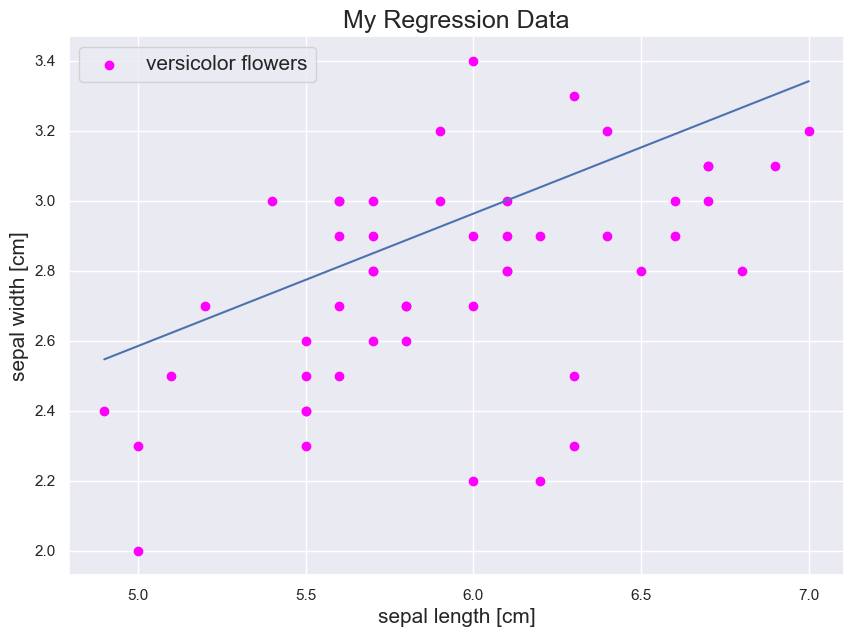

In [6]:
sepal_length_inputs_2 = filtered_iris['sepal_length'][filtered_iris['species'] == -1]
target_sepal_width_outputs_2 = filtered_iris['sepal_width'][filtered_iris['species'] == -1]
linreg_test_2 = SingleNeuron(1, model_type=SingleNeuron.type_linear_regression_1D)
linreg_test_2.train(sepal_length_inputs_2, target_sepal_width_outputs_2, learning_rate=0.05, num_epochs=200)
plt.figure(figsize = (10, 7))
plt.scatter(sepal_length_inputs_2, 
            target_sepal_width_outputs_2, 
            color = "magenta",
            label = "versicolor flowers")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
x = np.linspace(sepal_length_inputs_2.min(), sepal_length_inputs_2.max())
plt.plot(x, linreg_test_2.weights*x + linreg_test_2.bias)
plt.show()

In [29]:
linreg_test_2.reset_model()

(array(1.20165045), 1.2421077232875881)

In [8]:
linreg_test_2.current_weights_and_bias()

(array(nan), nan)

In [27]:

np.any(np.isinf(linreg_test_2.weights) or np.isnan(linreg_test_2.weights))

True

In [10]:
sepal_length_inputs = filtered_iris['sepal_length'][filtered_iris['species'] == 1].to_numpy()
target_sepal_width_outputs = filtered_iris['sepal_width'][filtered_iris['species'] == 1].to_numpy()

In [3]:
linreg_test = SingleNeuron(1, model_type=SingleNeuron.type_linear_regression_1D)
print(f"{linreg_test.current_weights_and_bias() = }")

linreg_test.current_weights_and_bias() = (array(0.65200058), 0.005270935981000913)


In [13]:
linreg_test.reset_model()
print(f"{linreg_test.current_weights_and_bias() = }")

linreg_test.current_weights_and_bias() = (array(-0.04385012), -1.4883181003581476)


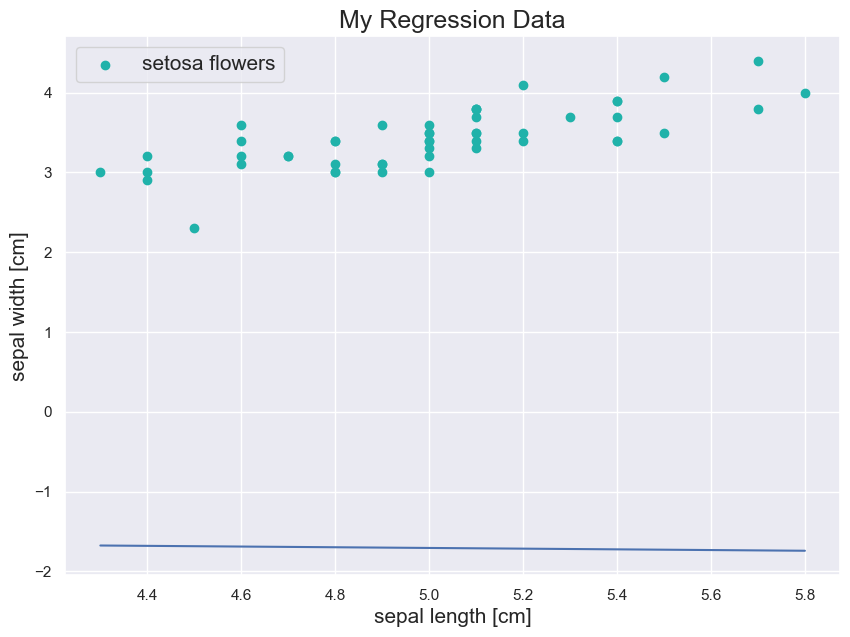

In [14]:
plt.figure(figsize = (10, 7))
plt.scatter(sepal_length_inputs, 
            target_sepal_width_outputs, 
            color = "lightseagreen",
            label = "setosa flowers")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
x = np.linspace(sepal_length_inputs.min(), sepal_length_inputs.max())
plt.plot(x, linreg_test.weights*x + linreg_test.bias)
plt.show()

In [19]:
print(f"{linreg_test.predict(sepal_length_inputs[0]) = }")
test_prediction = linreg_test.predict(sepal_length_inputs[0])
test_true_val = target_sepal_width_outputs[0]
print(f"{target_sepal_width_outputs[0] = }")
print(f"{SingleNeuron.regression_1D_stochastic_gradient(test_prediction, test_true_val) = }")
# print(f"{ = }")
# print(f"{ = }")
# print(f"{ = }")

linreg_test.predict(sepal_length_inputs[0]) = -1.7119537064741557
target_sepal_width_outputs[0] = 3.5
SingleNeuron.regression_1D_stochastic_gradient(test_prediction, test_true_val) = -5.211953706474156


In [12]:
linreg_test.train(sepal_length_inputs, target_sepal_width_outputs)

d:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\Single Neuron (draft)\SingleNeuronClass.py:221: RuntimeWarning: overflow encountered in square
  * np.sum((predicted_outputs - target_outputs)**2)
d:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\Single Neuron (draft)\SingleNeuronClass.py:501: RuntimeWarning: invalid value encountered in scalar subtract
  self.weights -= learning_rate * gradient * input
d:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\Single Neuron (draft)\SingleNeuronClass.py:502: RuntimeWarning: invalid value encountered in scalar subtract
  self.bias -= learning_rate * gradient


array([8.01858985e+001, 4.85157348e+109, 2.92561002e+217,             inf,
                   inf,             inf,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan])

In [ ]:
grad_update0 = linreg_test.linear_regression_1D_stochastic_gradient_update(sepal_length_inputs[0], target_sepal_width_outputs[0], 0.5, 1)
print(f"{grad_update0 = }")

In [ ]:
grad0 = SingleNeuron.linear_regression_1D_stochastic_gradient(linreg_test.predict_outputs(sepal_length_inputs[0]), target_sepal_width_outputs[0], 1)
print(f"{grad0 = }")

In [ ]:
loss0 = SingleNeuron.linear_regression_loss_function(linreg_test.predict_outputs(sepal_length_inputs[0]), target_sepal_width_outputs[0])
print(f"{loss0 = }")

In [ ]:
linreg_test.predict_outputs(sepal_length_inputs[0])

In [ ]:

print(f"{np.isscalar(sepal_length_inputs[0]) = }")
print(f"{linreg_test.data_dimension = }")

In [ ]:
print(f"{np.shape(sepal_length_inputs[0]) = }")
print(f"{np.shape(5) = }")
print(f"{np.shape(linreg_test.weights) = }")
print(f"{np.isscalar(linreg_test.weights)}")

In [ ]:
print(f"{np.shape(sepal_length_inputs[0]) = }")
print(f"{np.shape([sepal_length_inputs[0]]) = }")
print(f"{np.shape(linreg_test.weights) = }")
print(f"{np.shape([linreg_test.weights]) = }")
print(f"{np.shape(sepal_size_inputs[0]) = }")
print(f"{np.shape([sepal_size_inputs[0]]) = }")
print(f"{np.shape(model.weights) = }")
print(f"{np.shape([model.weights]) = }")
print(f"{np.shape(np.random.randn(2)) = }")
print(f"{np.shape(np.asarray(sepal_length_inputs[0])) = }")

In [ ]:
model = SingleNeuron(sepal_size_inputs.shape[1], model_type="perceptron")
model.current_weights_and_bias()

In [ ]:
model.perceptron_stochastic_gradient_update(sepal_size_inputs[4], target_species_output[4])

In [ ]:
model.train(sepal_size_inputs, target_species_output, num_epochs=1000)

In [ ]:
model.perceptron_stochastic_gradient_update(sepal_size_inputs[-1], target_species_output[-1])

In [ ]:
print(f"{model.predict_outputs(sepal_size_inputs[0]) = }, but  {target_species_output[0] = }")
gradient = SingleNeuron.perceptron_stochastic_gradient(model.predict_outputs(sepal_size_inputs[0]), target_species_output[0])
print(f"{gradient = }")

In [ ]:
model.reset_model()
model.current_weights_and_bias()

In [ ]:
predicted_outputs = model.predict_outputs(sepal_size_inputs)
print(f"{SingleNeuron.perceptron_loss_function(predicted_outputs, target_species_output) = }")
#hmm... why is this consistently outputting 50...
plt.figure(figsize=(8,6))
plt.scatter(sepal_size_inputs[target_species_output == 1, 0], 
            sepal_size_inputs[target_species_output == 1, 1], 
            color="magenta", label="Setosa (1)")
plt.scatter(sepal_size_inputs[target_species_output == -1, 0], 
            sepal_size_inputs[target_species_output == -1, 1], 
            color="green", label="Versicolor (-1)")
x = np.linspace(sepal_size_inputs[:,0].min(), sepal_size_inputs[:,0].max())
plt.plot(x, (-model.weights[0]*x - model.bias) / model.weights[1]) 

#Oh if it's frequently outputting 50 because it's getting 50 values wrong most of the time!

In [ ]:
print(f"{model.predict_outputs(sepal_size_inputs[0]) = }")
print(f"{model.predict_outputs(sepal_size_inputs[0:3]) = }")

In [ ]:
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias)
print(f"{preactivation_value = }")
print(f"{model.activation_function(preactivation_value) = }")

In [ ]:
print(f"{[sepal_size for sepal_size in sepal_size_inputs[0,:]] = }")

In [ ]:
sepal_size_inputs[0].ndim

In [ ]:
print(f"{SingleNeuron.preactivation(sepal_size_inputs[0], model.weights, model.bias) = }")
print(f"{np.dot(sepal_size_inputs[0], model.weights) + model.bias = }")

In [ ]:
print(f"{SingleNeuron.sign(-0.00001) = }")
print(f"{SingleNeuron.linear_1D(523/100) = }")

In [ ]:
sepal_size_inputs.shape

In [ ]:
sepal_size_inputs[target_species_output==1,1]

In [ ]:
print(f"{model.current_weights_and_bias() = }")
[current_weights, current_bias] = model.current_weights_and_bias()
print(f"{sepal_size_inputs[1] = }")
print(f"{SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias) = }")
preactivation_value = SingleNeuron.preactivation(sepal_size_inputs[1], current_weights, current_bias)
print(f"{model.activation_function(preactivation_value) = }")
print(f"{model.predict_outputs(sepal_size_inputs[1]) = }")
inputs = sepal_size_inputs
activation_values = [model.activation_function(SingleNeuron.preactivation(input, current_weights, current_bias)) for input in inputs]
print(f"{activation_values = }")
print(f"{model.predict_outputs(inputs) = }")

In [ ]:
[(SingleNeuron.sign(SingleNeuron.preactivation(sepal_size_inputs[1], model.weights, model.bias)))]

In [ ]:
print(f"{sepal_size_inputs[1] = }")
print(f"{np.shape(sepal_size_inputs[1]) = } but {np.shape(model.weights) = }")

In [ ]:
SingleNeuron.sign(np.float64(3.3034947687319463))

In [ ]:
print(f"{SingleNeuron.sign(0) = }")
print(f"{SingleNeuron.linear_1D(8.3) = }")

In [ ]:
print(f"{sepal_size_inputs.shape = }")
print(f"{sepal_size_inputs.shape[1] = }")
print(f"{sepal_size_inputs[1] = }")

In [ ]:
x = np.random.randn(3)
type(x) == np.ndarray

In [ ]:
y = np.random.randn(4)

In [ ]:
np.dot(x,y)

In [ ]:
np.dot(2,4)

In [ ]:
for xval in x:
    print(xval)

In [ ]:
a = np.zeros((2,2))
b = np.copy(a)
a[0,0] = 1
a[1,0] = 2
print(a)
print(b)
print(np.copy(3))

In [ ]:
print([A for A in a])